In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file='bank.csv'
bank_df = pd.read_csv('bank.csv', header=None,skiprows=1)
bank_df = bank_df[0].str.split(';', expand=True)
bank_df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [3]:
bank_df['balance'] = bank_df['balance'].astype(float)
bank_df['balance'] = bank_df['balance'].replace(',', '.', regex=True)
bank_df['age'] = bank_df['age'].astype(int)
bank_df['age'] = bank_df['age'].replace(' ', '0', regex=True)
bank_df['day'] = bank_df['day'].astype(int)
bank_df['day'] = bank_df['day'].replace(' ', '0', regex=True)
bank_df['campaign'] = bank_df['campaign'].astype(int)
bank_df['campaign'] = bank_df['campaign'].replace(' ', '0', regex=True)
bank_df['pdays'] = bank_df['pdays'].astype(int)
bank_df['pdays'] = bank_df['pdays'].replace(' ', '0', regex=True)
bank_df['previous'] = bank_df['previous'].astype(int)
bank_df['previous'] = bank_df['previous'].replace(' ', '0', regex=True)
bank_df['duration'] = bank_df['duration'].astype(int)
bank_df['duration'] = bank_df['duration'].replace(' ', '0', regex=True)

In [4]:
num=bank_df.select_dtypes(include=[np.number]).columns
cat=bank_df.select_dtypes(exclude=[np.number]).columns

In [5]:
num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [10]:
job_data=bank_df['job']
education_data=bank_df['education']
marital_data=bank_df['marital']

In [8]:
pd.crosstab(job_data, marital_data)

marital,"""divorced""","""married""","""single"""
job,,,
"""admin.""",69,266,143
"""blue-collar""",79,693,174
"""entrepreneur""",16,132,20
"""housemaid""",13,84,15
"""management""",119,557,293
"""retired""",43,176,11
"""self-employed""",15,127,41
"""services""",62,236,119
"""student""",0,10,74


In [11]:
pd.crosstab(job_data, [marital_data, education_data])

marital         "divorced"                                  "married"  \
education        "primary" "secondary" "tertiary" "unknown" "primary"   
job                                                                     
"admin."                 3          58          3         5        12   
"blue-collar"           37          37          0         5       284   
"entrepreneur"           2           5          8         1        22   
"housemaid"              6           5          2         0        48   
"management"             2          11        103         3        33   
"retired"               13          17          9         4        64   
"self-employed"          2           4          9         0        12   
"services"               5          53          1         3        15   
"student"                0           0          0         0         0   
"technician"             2          67         17         3        12   
"unemployed"             7          13          2         0        17   
"unknown"                0           0          1         0         7   

marital                                           "single"              \
education       "secondary" "tertiary" "unknown" "primary" "secondary"   
job                                                                      
"admin."                218         27         9         2         117   
"blue-collar"           377          3        29        48         110   
"entrepreneur"           45         55        10         2           8   
"housemaid"              20         12         4         3           3   
"management"             73        434        17         4          32   
"retired"                83         20         9         3           5   
"self-employed"          59         53         3         1          13   
"services"              204         11         6         5         106   
"student"                 4          3         3         2          43   
"technician"            299         88        12         1         154   
"unemployed"             38         19         1         2          17   
"unknown"                 7          2        14         0           1   

marital                               
education       "tertiary" "unknown"  
job                                   
"admin."                21         3  
"blue-collar"            9         7  
"entrepreneur"          10         0  
"housemaid"              8         1  
"management"           250         7  
"retired"                2         1  
"self-employed"         26         1  
"services"               4         4  
"student"               16        13  
"technician"           106         7  
"unemployed"            11         1  
"unknown"                5         1

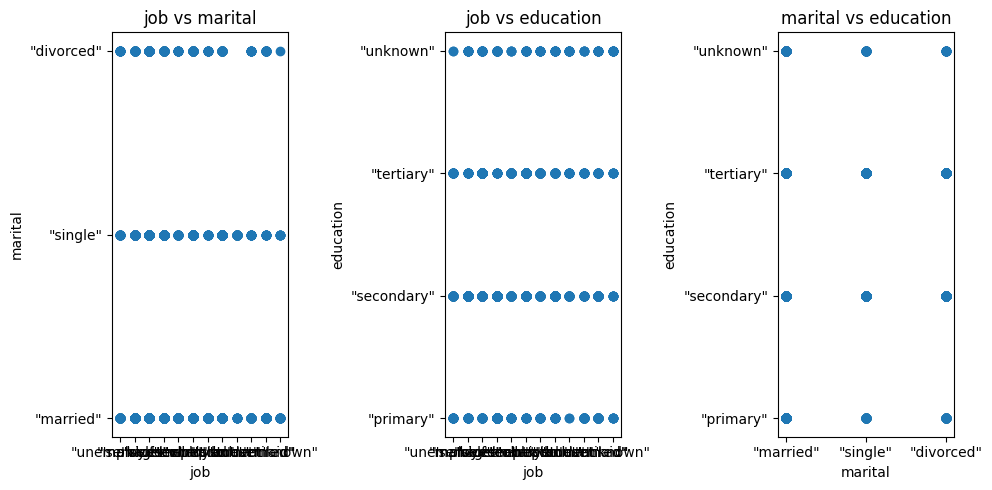

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1).scatter(job_data, marital_data)
plt.xlabel('job')
plt.ylabel('marital')
plt.title('job vs marital')
plt.subplot(1, 3, 2).scatter(job_data, education_data)
plt.xlabel('job')
plt.ylabel('education')
plt.title('job vs education')
plt.subplot(1, 3, 3).scatter(marital_data, education_data)
plt.xlabel('marital')
plt.ylabel('education')
plt.title('marital vs education')
plt.tight_layout()
plt.show()

**Correlation**

In [16]:
corr_bank = bank_df.corr(numeric_only=True)
corr_bank

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


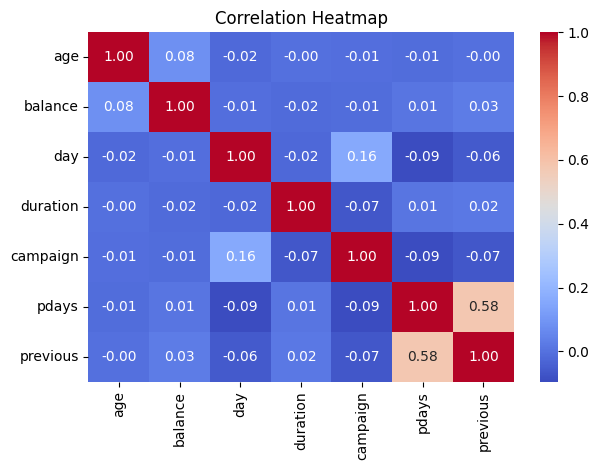

In [18]:
sns.heatmap(corr_bank, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()